## Description of Notebook

The notebook is used to prepare VDFs for linear stability analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm

In [2]:
simfiles = [\
'particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
'particles.d11_A0.75Hepp_beta1_256',\
'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
'particles.d11_E11Ap4.3Aa1.6',\
'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
'particles.d11_He++A10_256_iden0eps0',\
'particles.d11_He++v2_256_iden0eps1e-4t600',\
'particles.d11_He++vd1.5_256_iden0eps1e-4',\
'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
'particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
'particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
'particles.d11_vap1.5Ap1.5Aa1rdna_0.007',\
'particles.d11_e260945ap1.30.5_1',\
'particles.d11_e260955ap2.20.4_2',\
'particles.d11_e261013ap1.50.6_3',\
'particles.d11_e261016ap1.70.6_4',\
'particles.d11_e261019ap1.50.4_5',\
'particles.d11_e261022ap1.40.4_6',\
'particles.d11_e261040ap1.40.4_7',\
'particles.d11_pv1.4av2Ap2Apb2betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2Ap2Apb2beta_pb0.429_128_128x2_dx0.75',\
'particles.d11_pv2av1.4Ap1Aa1betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2av1.4Ap2Aa2betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2av1.4Ap2Ab2beta0.429_128_128x4_dx0.75_t3000',\
'particles.d11_pv2av2Ap1Aa1beta0.429_128_128x4_dx0.75_t3000',\
'particles.d11_pv2av2Ap2Aa2beta0.429_128_128x4_dx0.75_t3000']


fldfiles = [\
'fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
'fields.d10_A0.75Hepp_beta1_256',\
'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
'fields.d10_E11Ap4.3Aa1.6',\
'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
'fields.d10_He++A10_256_iden0eps0',\
'fields.d10_He++v2_256_iden0eps1e-4t600',\
'fields.d10_He++vd1.5_256_iden0eps1e-4',\
'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
'fields.d10_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
'fields.d10_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
'fields.d10_vap1.5Ap1.5Aa1rdna_0.007',\
'fields.d10_e260945ap1.30.5_1',\
'fields.d10_e260955ap2.20.4_2',\
'fields.d10_e261013ap1.50.6_3',\
'fields.d10_e261016ap1.70.6_4',\
'fields.d10_e261019ap1.50.4_5',\
'fields.d10_e261022ap1.40.4_6',\
'fields.d10_e261040ap1.40.4_7',\
'fields.d10_pv1.4av2Ap2Apb2betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2Ap2Apb2beta_pb0.429_128_128x2_dx0.75',\
'fields.d10_pv2av1.4Ap1Aa1betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2av1.4Ap2Aa2betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2av1.4Ap2Ab2beta0.429_128_128x4_dx0.75_t3000',\
'fields.d10_pv2av2Ap1Aa1beta0.429_128_128x4_dx0.75_t3000',\
'fields.d10_pv2av2Ap2Aa2beta0.429_128_128x4_dx0.75_t3000']

populations = [\
[0.9,0.05],\
[0.9,0.05],\
[0.986,0.007],\
[0.986,0.007],\
[0.986,0.007],\
[0.986,0.007],\
[0.9,0.05],\
[0.9,0.05],\
[0.9,0.05],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[0.91,0.045],\
[0.9,0.05],\
[0.986,0.007],\
[0.986,0.007],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[1.00,0.00],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045]]

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(151, 320, 320)


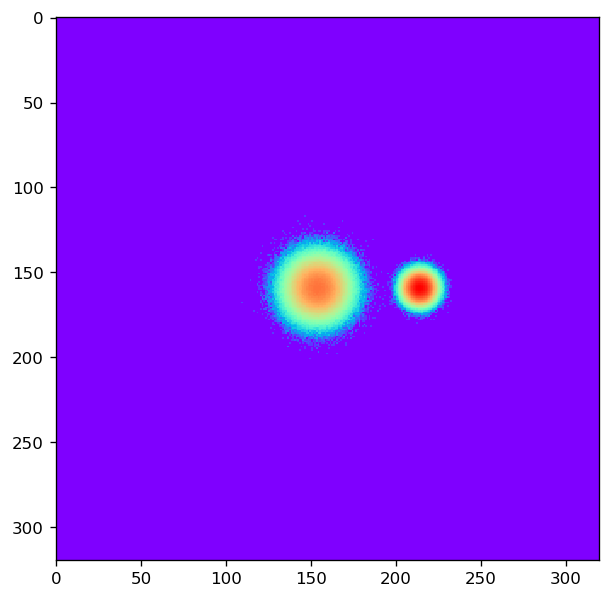

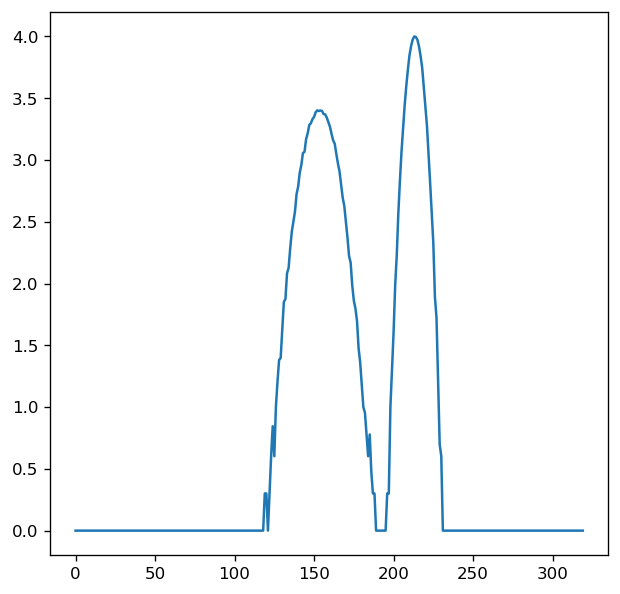

In [10]:
for simindex in range (0, len(simfiles), 1):

    if (simindex != 9): continue
    
    simfile = simfiles[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
        
    print(vdfp_array.shape)
        
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.imshow(np.log10(vdfp_array[0,:,:].T+1), cmap='rainbow', interpolation='nearest')
    plt.show()
    
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.plot(np.log10(vdfp_array[0,:,160]+1))
    plt.show()

In [13]:
for simindex in range (0, len(simfiles), 1):
    
    simfile = simfiles[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
        
    # figuring out if there is a He component
    He_total = np.sum(vdfhe_array)
    if (He_total == 0):
        print("No He for this simulation run")
        vdfs = np.zeros([vdfp_array.shape[0],1,vdfp_array.shape[1],vdfp_array.shape[2]], dtype=float)
        vdfs[:,0,:,:] = vdfp_array
    else:
        print("Both H and He are presented")
        vdfs = np.zeros([vdfp_array.shape[0],2,vdfp_array.shape[1],vdfp_array.shape[2]], dtype=float)
        vdfs[:,0,:,:] = vdfp_array
        vdfs[:,1,:,:] = vdfp_array
    np.save('./VDFs_fullres/' + simfile + '.vdfs.npy', vdfs)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Both H and He are presented
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Both H and He are presented
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Both H and He are presented
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Both H and He are presented
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Both H and He are presented
vvv